In [1]:
# some setup 
import numpy as np
import matplotlib.pyplot as plt
# from scipy.integrate import solve_ivp, odeint

exec(open('importc4d.py').read())

<module 'C4dynamics' from 'd:\\gh_repo\\C4dynamics\\..\\C4dynamics\\__init__.py'>

In [2]:
beta0 = 1
A = np.array([[0, 1, 0], [0, -np.sqrt(2 * 0.0034 * c4d.params.g / beta0), -c4d.params.g / beta0], [0, 0, 0]])
b = np.array([[0], [0], [0]])
c = np.array([1, 0, 0])
ifilter = c4d.filters.luenberger(A, c)


In [3]:
# objects definition 

#
# just scale factor
##
rdr = c4d.seekers.radar(sf = 0.9, bias = 0, noisestd = 0)
# rdr.sf = 0.9    # -10% percents 
# rdr.bias = 0 # meter bias
# rdr.noise = 0 # the std of the noise is 10m error. 

dsf = []
# main loop 
for r in range(1000):
    dsf.append([r, rdr.measure(r)])   
dsf = np.asarray(dsf)


#
# scale factor and bias
##
rdr = c4d.seekers.radar(sf = 0.9, bias = -70, noisestd = 0)
# rdr.sf = 0.9    # -10% percents 
# rdr.bias = -70 # meter bias
# rdr.noise = 0 # the std of the noise is 10m error. 

dbias = []
# main loop 
for r in range(1000):
    dbias.append([r, rdr.measure(r)])   
dbias = np.asarray(dbias)


#
# scale factor, bias and noise
##
rdr = c4d.seekers.radar(sf = 0.9, bias = -70, noisestd = 20)
# rdr.sf = 0.9    # -10% percents 
# rdr.bias = -70 # meter bias
# rdr.noise = 20 # the std of the noise is 10m error. 

dns = []
# main loop 
for r in range(1000):
    dns.append([r, rdr.measure(r)])   
dns = np.asarray(dns)



In [4]:
# # low pass filter 
#   TBD: add noise to radar seeker and filter with lpf. 

# # objects definition 
# rdr = c4d.seekers.dzradar([0, 0, 0], c4d.filters.filtertype.lowpass, .01)

# # just scale factor
# rdr.sf = 1    # -10% percents 
# rdr.bias = 0 # meter bias
# rdr.noise = 40 # the std of the noise is 10m error. 

# dnse = []
# # main loop 
# for r in range(1000):
#     m = rdr.measure(r)
#     # rdr.filter(r / 100)
#     dnse.append([r, m, rdr.r])   
# dnse = np.asarray(dnse)


# plt.figure()
# plt.plot(dnse[:r, 0], dnse[:r, 0], 'k', linewidth = 2)
# plt.plot(dnse[:r, 0], dnse[:r, 1], 'm', linewidth = 1)
# plt.plot(dnse[:r, 0], dnse[:r, 2], 'c', linewidth = 1)


In [5]:


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
# plt.rcParams['text.usetex'] = True

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# 
# plt.show() plots all the figures present in the state machine. Calling it only at the end of 
#       the script, ensures that all previously created figures are plotted.
# Now you need to make sure that each plot indeed is created in a different figure. That can be 
#       achieved using plt.figure(fignumber) where fignumber is a number starting at index 1.
#

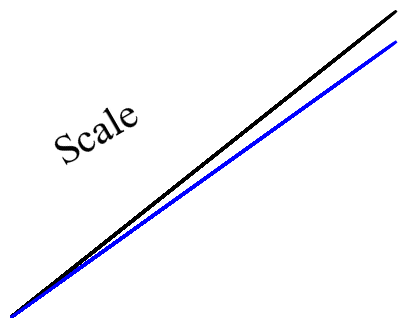

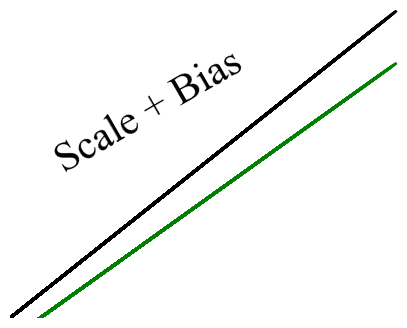

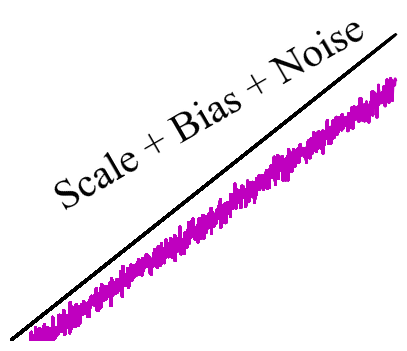

In [6]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18

# plt.plot(data)
fol = os.getcwd() + '/fig'
if not os.path.exists(fol):
    os.mkdir(fol)
    
    
rot = 30

plt.figure(1)
# plt.title('scale factor')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.text(100, 600
         , "Scale"
         , size = 30
         , ha = "left" 
         , va = "center"
         , rotation = rot
         , fontfamily = 'Times New Roman'
         )
plt.axis('off')

plt.figure(2)
# plt.title('scale factor & bias')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.text(100, 670
         , "Scale + Bias"
         , size = 30
         , ha = "left" 
         , va = "center"
         , rotation = rot
         , fontfamily = 'Times New Roman'
         )
plt.axis('off')

plt.figure(3)
# plt.title('scale factor & bias & noise')
plt.xlim(0, 1000)
plt.ylim(0, 1000)  
plt.text(100, 740
         , "Scale + Bias + Noise"
         , size = 30
         , ha = "left" 
         , va = "center"
         , rotation = rot
         , fontfamily = 'Times New Roman'
         )
plt.axis('off')
    
for r in range(0, 1000, 4):
    plt.figure(1)
    plt.plot(dsf[:r, 0], dsf[:r, 0], 'k', linewidth = 2)
    plt.plot(dsf[:r, 0], dsf[:r, 1], 'b', linewidth = 2) 
    # plt.title('scale factor')
    # plt.xlim(0, 1000)
    # plt.ylim(0, 1000)
    plt.savefig(fol + "/a_sf_" + str(r), dpi = 72) # frames
# plt.show()

    plt.figure(2)
    plt.plot(dsf[:r, 0], dsf[:r, 0], 'k', linewidth = 2)
    plt.plot(dbias[:r, 0], dbias[:r, 1], 'g', linewidth = 2)
    # plt.title('scale factor & bias')
    # plt.xlim(0, 1000)
    # plt.ylim(0, 1000)
    plt.savefig(fol + "/b_sf_bias_" + str(r), dpi = 72) # frames
# plt.show()

    plt.figure(3)
    plt.plot(dsf[:r, 0], dsf[:r, 0], 'k', linewidth = 2)
    plt.plot(dns[:r, 0], dns[:r, 1], 'm', linewidth = 2)
    # plt.title('scale factor & bias & noise')
    # plt.xlim(0, 1000)
    # plt.ylim(0, 1000)
    plt.savefig(fol + "/c_sf_bias_noise" + str(r), dpi = 72) # frames

# plt.show()


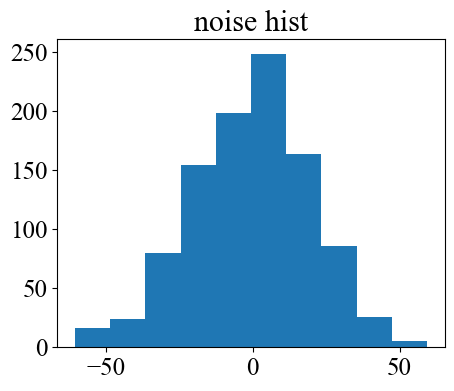

In [7]:
plt.hist(rdr.noisestd * np.random.randn(1000))
plt.title('noise hist')
plt.show()

In [8]:
import natsort
import shutil

fdir = os.listdir(os.path.join(os.getcwd(), 'fig'))
f = natsort.natsorted([os.path.join(os.getcwd(), 'fig', fi) for fi in fdir if fi.lower().endswith('png')])

# filter 3/4 of the samples 
# for g in range(0000, 3000, 4):
#     shutil.copy(f[g], os.getcwd() + '\\fig')  


c4d.tools.gen_gif(os.path.join(os.getcwd(), 'fig'))

_img_movie.gif is saved in d:\gh_repo\C4dynamics
